# Lab  #3

First and Last Name: Hanzala Akram

Student ID: 500899943

Video URL: N/A - Demo done in class

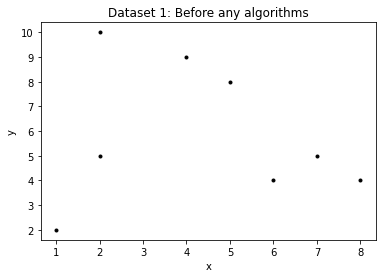

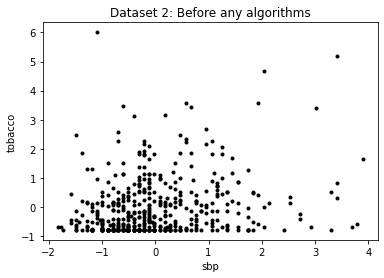



Part A



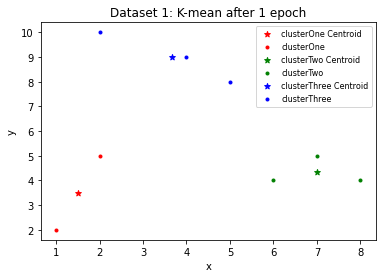

[1.5 3.5] [7.         4.33333333] [3.66666667 9.        ]




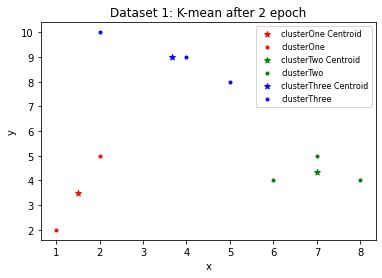

[1.5 3.5] [7.         4.33333333] [3.66666667 9.        ]




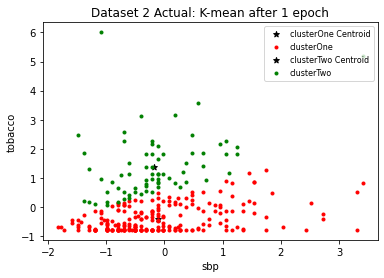

[-0.10727712 -0.41427972] [-0.17504939  1.38177125]




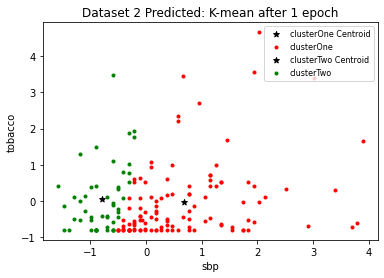

[ 0.67436777 -0.03186213] [-0.78747003  0.05961886]


Part B



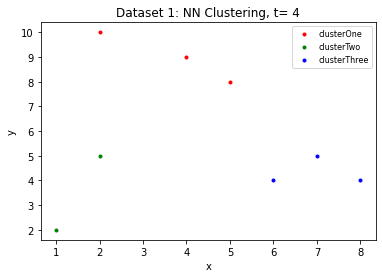

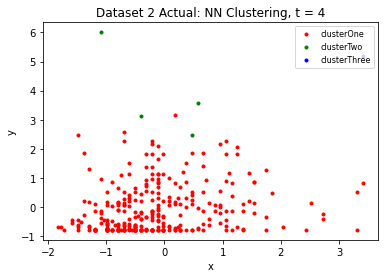

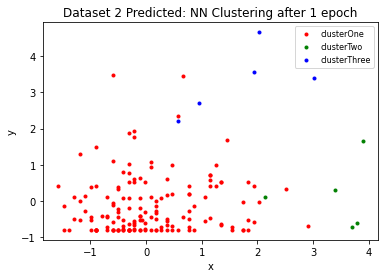



Part C



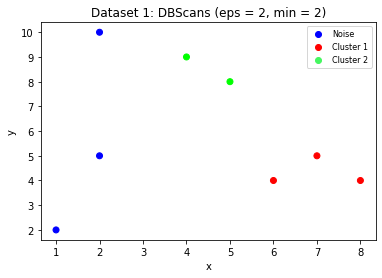

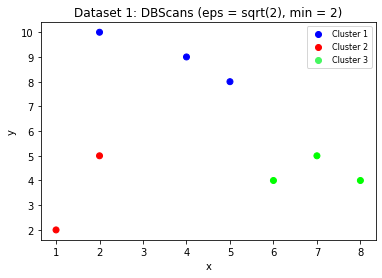

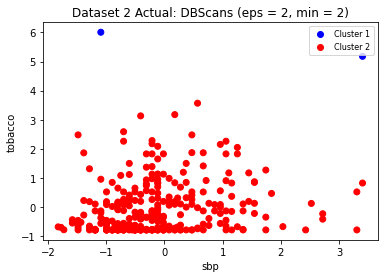

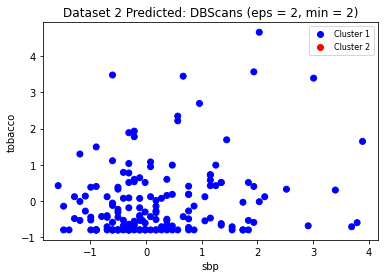



Part D



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


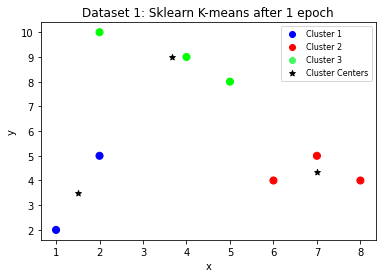

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


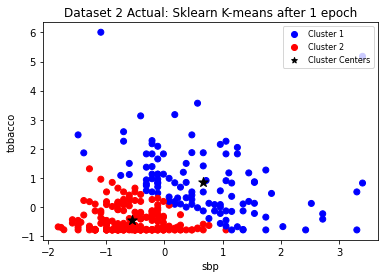

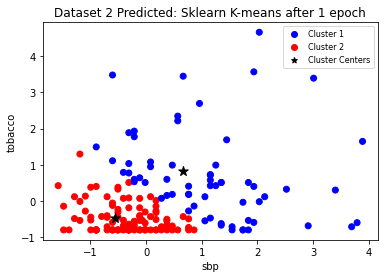



Silhouette score: 0.4401711203680926




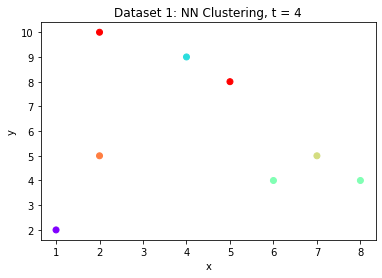

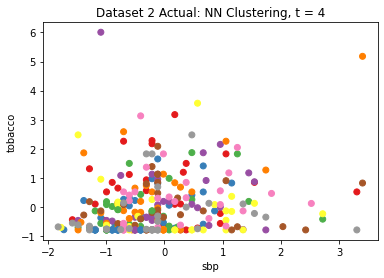

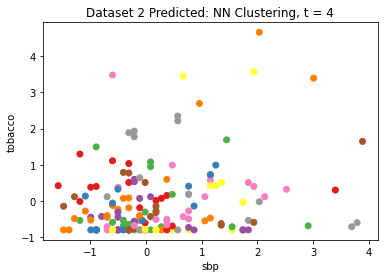

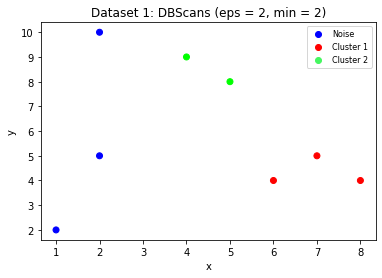

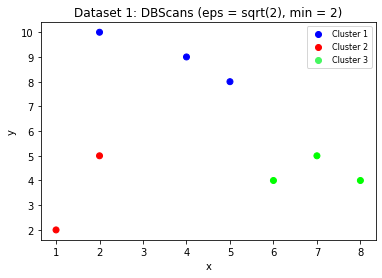

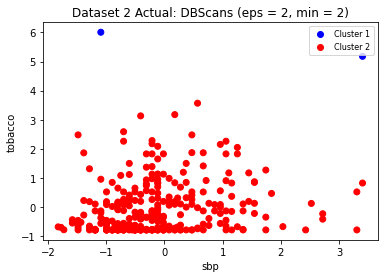

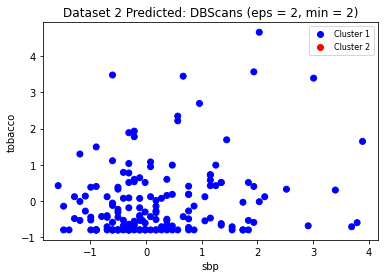

In [177]:
from pandas.core.arrays.sparse import array
import matplotlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Functions #
# Standardize function, find mean and standard deviation and outputs standardized value
def standardizeFunc(input):
  inputMean = np.mean(input)
  inputStd = np.std(input)
  standardInput = (input - inputMean)/inputStd
  return standardInput

# Euclidean distance function, find distance between two points
def euclideanDistanceFunc(point1, point2):
  sum_sq = np.sum(np.square(point1 - point2))
  dist = np.sqrt(sum_sq)
  return dist

# K-means function for three clusters
def kMeansFunc(data, seed1, seed2, seed3):
  seedOne = seed1
  seedTwo = seed2
  seedThree = seed3
  clusterOne = []
  clusterTwo = []
  clusterThree = []
  for i in range(len(data)):
    dist1 = euclideanDistanceFunc(data[i], seedOne)
    dist2 = euclideanDistanceFunc(data[i], seedTwo)
    dist3 = euclideanDistanceFunc(data[i], seedThree)
    if (dist1 < dist2) & (dist1 < dist3):
      clusterOne.append(data[i])
    elif (dist2 < dist1) & (dist2 < dist3):
      clusterTwo.append(data[i])
    elif (dist3 < dist1) & (dist3 < dist2):
      clusterThree.append(data[i])

  clusterOne = np.array(clusterOne)
  clusterTwo = np.array(clusterTwo)
  clusterThree = np.array(clusterThree)
  return clusterOne, clusterTwo, clusterThree

# K-means function for two clusters (dataset2)
def kMeansFuncDataTwo(data, seed1, seed2, start, end):
  seedOne = seed1
  seedTwo = seed2
  clusterOne = []
  clusterTwo = []
  for i in range(start,end):
    dist1 = euclideanDistanceFunc(data[i], seedOne)
    dist2 = euclideanDistanceFunc(data[i], seedTwo)
    if (dist1 < dist2):
      clusterOne.append(data[i])
    elif (dist2 < dist1):
      clusterTwo.append(data[i])

  clusterOne = np.array(clusterOne)
  clusterTwo = np.array(clusterTwo)
  return clusterOne, clusterTwo

# K-means find centroid function
def kMeansFindCentroid(cluster):
  xCluster = 0
  yCluster = 0
  newSeed = 0
  # Find sum of x and y coordinartes in the cluster
  sumCluster = np.sum(cluster, axis = 0)
  # Find new centroid for cluster
  xCluster = sumCluster[0]/len(cluster)
  yCluster = sumCluster[1]/len(cluster)
  newSeed = np.array([xCluster, yCluster])
  return newSeed

# Nearest Neighbour function
def nearestNeighbourClusteringFunc(data, threshold):
    # First data point is placed into its own cluster
    clusters = [[data[0]]]
    for i in data[1:]:
        nearestCluster = None
        minDist = float('inf')
        for cluster in clusters:
            centroid = np.mean(cluster, axis=0)
            distance = euclideanDistanceFunc(i, centroid)
            if distance < minDist:
                nearestCluster = cluster
                minDist = distance
        if minDist <= threshold:
            nearestCluster.append(i)
        else:
            clusters.append([i])

    clusters = [np.array(cluster) for cluster in clusters]
    return clusters

# Nearest Neighbour function for dataset2
def nearestNeighbourClusteringFuncDataTwo(data, threshold, start, end):
    # First data point is placed into its own cluster
    clusters = [[data[start]]]
    for i in data[start+1:end]:
        nearestCluster = None
        minDist = float('inf')
        for cluster in clusters:
            centroid = np.mean(cluster, axis=0)
            distance = euclideanDistanceFunc(i, centroid)
            if distance < minDist:
                nearestCluster = cluster
                minDist = distance
        if minDist <= threshold:
            nearestCluster.append(i)
        else:
            clusters.append([i])

    clusters = [np.array(cluster) for cluster in clusters]
    return clusters

# Point graphing function
def plotPoints(xPoints,yPoints,title,xLabel,yLabel, marker, color):
  plot = plt.scatter(xPoints,yPoints, marker = marker, color = color)
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  return plot

# Initializing datasets and values for dataset 1 #
points = {'x': [2, 2, 8, 5, 7, 6, 1, 4], 'y': [10, 5, 4, 8, 5, 4, 2, 9]}
data1 = pd.DataFrame(data=points)
Xd1 = data1.values

# Initializing datasets and values for dataset 2 #
# Data sets to be used 
data2 = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")  
# Droping row.names column as its not needed
del data2['row.names']
# Creating feature vector and output vector datasets 
X = data2.copy()
del X['chd']
Y = data2.copy()
Y = Y.drop(columns=['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age', 'famhist'], axis=1)
Y = Y['chd']
# Changing categorical columns into numerical equivalencies where Present = 1, and Absent = 0 
X = pd.get_dummies(X, drop_first=True) 
X = X.rename(columns={'famhist_Present': 'famhist'})
# Standardization #
standardX = standardizeFunc(X)
# Don't want to standardize categorical feature so replacing column to non standardized version
standardX = standardX.assign(famhist=X['famhist'])

Xd2 = standardX[["sbp", "tobacco"]].values

# Plot initial graph of dataset 1
plotPoints(Xd1[:,0], Xd1[:,1],  "Dataset 1: Before any algorithms", "x", "y", '.', 'black') 
plt.show()
print("\n")
# Plot initial graph of dataset 2
c1 = plotPoints(Xd2[:,0], Xd2[:,1], "Dataset 2: Before any algorithms", "sbp", "tobacco", '.', 'black')
plt.show()
print("\n")

# ---------- PART A ---------- #
print("Part A\n")
# Dataset 1
# Apply k-means algorithm to find clusters
clusterOne, clusterTwo, clusterThree = kMeansFunc(Xd1, Xd1[1], Xd1[2], Xd1[7])
# Find new centroids
newSeedOne = kMeansFindCentroid(clusterOne)
newSeedTwo = kMeansFindCentroid(clusterTwo)
newSeedThree = kMeansFindCentroid(clusterThree)

# Plot centroids and points in new clusters
c1c = plotPoints(newSeedOne[0], newSeedOne[1], "Dataset 1: K-mean after 1 epoch", "x", "y", '*', 'red')
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 1: K-mean after 1 epoch", "x", "y", '.', 'red')
c2c = plotPoints(newSeedTwo[0], newSeedTwo[1], "Dataset 1: K-mean after 1 epoch", "x", "y", '*', 'green')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 1: K-mean after 1 epoch", "x", "y", '.', 'green')
c3c = plotPoints(newSeedThree[0], newSeedThree[1], "Dataset 1: K-mean after 1 epoch", "x", "y", '*', 'blue')
c3 = plotPoints(clusterThree[:,0], clusterThree[:,1], "Dataset 1: K-mean after 1 epoch", "x", "y", '.', 'blue')
plt.legend((c1c, c1, c2c, c2, c3c, c3), ('clusterOne Centroid', 'clusterOne', 'clusterTwo Centroid', 'clusterTwo', 'clusterThree Centroid', 'clusterThree'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print(newSeedOne, newSeedTwo, newSeedThree)
print("\n")

# Apply k-means algorithm to find clusters
clusterOne, clusterTwo, clusterThree = kMeansFunc(Xd1, newSeedOne, newSeedTwo, newSeedThree)
# Find new centroids
newSeedOne = kMeansFindCentroid(clusterOne)
newSeedTwo = kMeansFindCentroid(clusterTwo)
newSeedThree = kMeansFindCentroid(clusterThree)
# Plot centroids and points in new clusters
c1c = plotPoints(newSeedOne[0], newSeedOne[1], "Dataset 1: K-mean after 2 epoch", "x", "y", '*', 'red')
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 1: K-mean after 2 epoch", "x", "y", '.', 'red')
c2c = plotPoints(newSeedTwo[0], newSeedTwo[1], "Dataset 1: K-mean after 2 epoch", "x", "y", '*', 'green')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 1: K-mean after 2 epoch", "x", "y", '.', 'green')
c3c = plotPoints(newSeedThree[0], newSeedThree[1], "Dataset 1: K-mean after 2 epoch", "x", "y", '*', 'blue')
c3 = plotPoints(clusterThree[:,0], clusterThree[:,1], "Dataset 1: K-mean after 2 epoch", "x", "y", '.', 'blue')
plt.legend((c1c, c1, c2c, c2, c3c, c3), ('clusterOne Centroid', 'clusterOne', 'clusterTwo Centroid', 'clusterTwo', 'clusterThree Centroid', 'clusterThree'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print(newSeedOne, newSeedTwo, newSeedThree)
print("\n")

# Dataset 2
# Apply k means and find centroids for actual dataset
seedOne = random.randrange(300)
seedTwo = random.randrange(300)
clusterOne, clusterTwo = kMeansFuncDataTwo(Xd2, Xd2[seedOne], Xd2[seedTwo], 0, 300)
newSeedOne = kMeansFindCentroid(clusterOne)
newSeedTwo = kMeansFindCentroid(clusterTwo)
# Plot points and centroids
c1c = plotPoints(newSeedOne[0], newSeedOne[1], "Dataset 2 Actual:  K-mean after 1 epoch", "sbp", "tobacco", '*', 'black')
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 2 Actual: K-mean after 1 epoch", "sbp", "tobacco", '.', 'red')
c2c = plotPoints(newSeedTwo[0], newSeedTwo[1], "Dataset 2 Actual: K-mean after 1 epoch", "sbp", "tobacco", '*', 'black')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 2 Actual: K-mean after 1 epoch", "sbp", "tobacco", '.', 'green')
plt.legend((c1c, c1, c2c, c2), ('clusterOne Centroid', 'clusterOne', 'clusterTwo Centroid', 'clusterTwo'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print(newSeedOne, newSeedTwo)
print("\n")

# Apply k means and find centroids for predicted dataset
seedOne = random.randrange(301,len(Xd2))
seedTwo = random.randrange(301,len(Xd2))
clusterOne, clusterTwo = kMeansFuncDataTwo(Xd2, Xd2[seedOne], Xd2[seedTwo], 301, len(Xd2))
newSeedOne = kMeansFindCentroid(clusterOne)
newSeedTwo = kMeansFindCentroid(clusterTwo)
# Plot points and centroids
c1c = plotPoints(newSeedOne[0], newSeedOne[1], "Dataset 2 Predicted:  K-mean after 1 epoch", "sbp", "tobacco", '*', 'black')
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 2 Predicted: K-mean after 1 epoch", "sbp", "tobacco", '.', 'red')
c2c = plotPoints(newSeedTwo[0], newSeedTwo[1], "Dataset 2 Predicted: K-mean after 1 epoch", "sbp", "tobacco", '*', 'black')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 2 Predicted: K-mean after 1 epoch", "sbp", "tobacco", '.', 'green')
plt.legend((c1c, c1, c2c, c2), ('clusterOne Centroid', 'clusterOne', 'clusterTwo Centroid', 'clusterTwo'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print(newSeedOne, newSeedTwo)
print("\n")

# ---------- PART B ---------- #
print("Part B\n")
# Dataset 1
# Apply NN clustering for dataset 1
threshold = 4 
clusters = nearestNeighbourClusteringFunc(Xd1, threshold)

# Print the clusters to determine number of clusters then make varaible for each cluster
# for i, cluster in enumerate(clusters):
#     print(f"Cluster {i+1}: {cluster}")

# Make varaible for clusters (in this dataset with threshold = 4, its 3)
clusterOne = clusters[0]
clusterTwo = clusters[1]
clusterThree = clusters[2]
# Plot new clusters
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 1: NN Clustering, t = 4 ", "x", "y", '.', 'red')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 1: NN Clustering, t = 4 ", "x", "y", '.', 'green')
c3 = plotPoints(clusterThree[:,0], clusterThree[:,1], "Dataset 1: NN Clustering, t= 4", "x", "y", '.', 'blue')
plt.legend((c1, c2, c3), ('clusterOne', 'clusterTwo', 'clusterThree'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print("\n")

# Datasset 2
# Apply NN clustering for actual dataset 
threshold = 4 
clusters = nearestNeighbourClusteringFuncDataTwo(Xd2, threshold, 0 , 300)

# Print the clusters to determine number of clusters then make varaible for each cluster
# for i, cluster in enumerate(clusters):
#     print(f"Cluster {i+1}: {cluster}")

# Make varaible for clusters (in this dataset with threshold = 4, its 3)
clusterOne = clusters[0]
clusterTwo = clusters[1]
clusterThree = clusters[2]
# Plot new clusters
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 2 Actual: NN Clustering, t = 4", "x", "y", '.', 'red')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 2 Actual: NN Clustering, t = 4", "x", "y", '.', 'green')
c3 = plotPoints(clusterThree[:,0], clusterThree[:,1], "Dataset 2 Actual: NN Clustering, t = 4", "x", "y", '.', 'blue')
plt.legend((c1, c2, c3), ('clusterOne', 'clusterTwo', 'clusterThree'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print("\n")

# Apply NN clustering for predicted dataset 
threshold = 4 
clusters = nearestNeighbourClusteringFuncDataTwo(Xd2, threshold, 301 , len(Xd2))

# Print the clusters to determine number of clusters then make varaible for each cluster
# for i, cluster in enumerate(clusters):
#     print(f"Cluster {i+1}: {cluster}")

# # Make varaible for clusters (in this dataset with threshold = 4, its 3)
clusterOne = clusters[0]
clusterTwo = clusters[1]
clusterThree = clusters[2]
# Plot new clusters
c1 = plotPoints(clusterOne[:,0], clusterOne[:,1], "Dataset 2 Predicted: NN Clustering after 1 epoch", "x", "y", '.', 'red')
c2 = plotPoints(clusterTwo[:,0], clusterTwo[:,1], "Dataset 2 Predicted: NN Clustering after 1 epoch", "x", "y", '.', 'green')
c3 = plotPoints(clusterThree[:,0], clusterThree[:,1], "Dataset 2 Predicted: NN Clustering after 1 epoch", "x", "y", '.', 'blue')
plt.legend((c1, c2, c3), ('clusterOne', 'clusterTwo', 'clusterThree'), scatterpoints=1, loc='upper right', ncol=1, fontsize=8)
plt.show()
print("\n")

# ---------- PART C ---------- #
print("Part C\n")
# Dataset 1
# Datasset 1
# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=2, min_samples=2).fit(Xd1)
labels = db.labels_
# Plotting the clusters
plt.scatter(Xd1[:,0], Xd1[:,1], c=labels, cmap='brg')
plt.title('Dataset 1: DBScans (eps = 2, min = 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[plt.scatter([],[], c='b', label='Noise'),
                    plt.scatter([],[], c='r', label='Cluster 1'),
                    plt.scatter([],[], c='#45f760', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")
# Apply DBSCAN for (eps=sqrt(10), min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(Xd1)
labels = db.labels_
# Plotting the clusters
plt.scatter(Xd1[:,0], Xd1[:,1], c=labels, cmap='brg')
plt.title('Dataset 1: DBScans (eps = sqrt(2), min = 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2'),
                    plt.scatter([],[], c='#45f760', label='Cluster 3')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")

# Dataset 2
X_train, X_test = Xd2[:300], Xd2[300:]
# Apply DBSCAN on training data
db = DBSCAN(eps=2, min_samples=2).fit(X_train)
labels_train = db.labels_
# Plot Actual(train) Data
plt.scatter(X_train[:,0], X_train[:,1], c=labels_train, cmap='bwr')
plt.title('Dataset 2 Actual: DBScans (eps = 2, min = 2)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")

# Apply DBSCAN on testing data
labels_test = db.fit_predict(X_test)
# Plot Predicted(test) Data
plt.scatter(X_test[:,0], X_test[:,1], c=labels_test, cmap='bwr')
plt.title('Dataset 2 Predicted: DBScans (eps = 2, min = 2)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")

# ---------- PART D ---------- #
print("Part D\n")
# K-means
# Dataset 1
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xd1)
y_kmeans = kmeans.predict(Xd1)
centers = kmeans.cluster_centers_
# Plot data
plt.scatter(Xd1[:, 0], Xd1[:, 1], c=y_kmeans, s=50, cmap='brg')
plt.scatter(centers[:, 0], centers[:, 1], c ='black', marker = '*');
plt.title("Dataset 1: Sklearn K-means after 1 epoch")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2'),
                    plt.scatter([],[], c='#45f760', label='Cluster 3'),
                    plt.scatter([],[], marker='*', c='black', label='Cluster Centers')],
           loc='upper right', fontsize=8)
plt.show()

# Dataset 2
X_train, X_test = Xd2[:300], Xd2[300:]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_test = kmeans.predict(X_test)
labels_train = kmeans.labels_
centers_train = kmeans.cluster_centers_
# Plot Actual(train) Data
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_train, cmap='bwr')
plt.scatter(centers_train[:, 0], centers_train[:, 1], c='black', marker='*', s = 100)
plt.title("Dataset 2 Actual: Sklearn K-means after 1 epoch")
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2'),
                    plt.scatter([],[], marker='*', c='black', label='Cluster Centers')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")
# Plot Predicted(test) Data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr')
plt.scatter(centers_train[:, 0], centers_train[:, 1], c='black', marker='*', s = 100)
plt.title("Dataset 2 Predicted: Sklearn K-means after 1 epoch")
plt.xlabel("sbp")
plt.ylabel("tobacco")
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2'),
                    plt.scatter([],[], marker='*', c='black', label='Cluster Centers')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")
silhouette_score = silhouette_score(X_train, labels_train)
print("Silhouette score:", silhouette_score)
print("\n")

# NN clustering
# Dataset 1
# Apply NN clustering with 2 clusters
nn = NearestNeighbors(n_neighbors=4).fit(Xd1)
distances, indices = nn.kneighbors(Xd1)
# Plot the clusters
plt.scatter(Xd1[:, 0], Xd1[:, 1], c=indices[:, 1], cmap='rainbow')
plt.title('Dataset 1: NN Clustering, t = 4')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print("\n")

# Dataset 2
X_train, X_test = Xd2[:300], Xd2[300:]
# Apply Nearest Neighbors clustering on training data
nn = NearestNeighbors(n_neighbors=4).fit(X_train)
distances, indices = nn.kneighbors(X_train)
# Plot Actual(train) Data
plt.scatter(X_train[:,0], X_train[:,1], c=indices[:,0], cmap='Set1')
plt.title('Dataset 2 Actual: NN Clustering, t = 4')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()
print("\n")
# Plot Predicted(test) Data
distances, indices = nn.kneighbors(X_test)
labels_test = indices[:,0]
# Plotting the clusters on testing data
plt.scatter(X_test[:,0], X_test[:,1], c=labels_test, cmap='Set1')
plt.title('Dataset 2 Predicted: NN Clustering, t = 4')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.show()
print("\n")

# DBScan
# Datasset 1
# Apply DBSCAN for (eps=2, min_samples=2)
db = DBSCAN(eps=2, min_samples=2).fit(Xd1)
labels = db.labels_
# Plotting the clusters
plt.scatter(Xd1[:,0], Xd1[:,1], c=labels, cmap='brg')
plt.title('Dataset 1: DBScans (eps = 2, min = 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[plt.scatter([],[], c='b', label='Noise'),
                    plt.scatter([],[], c='r', label='Cluster 1'),
                    plt.scatter([],[], c='#45f760', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")
# Apply DBSCAN for (eps=sqrt(10), min_samples=2)
db = DBSCAN(eps=np.sqrt(10), min_samples=2).fit(Xd1)
labels = db.labels_
# Plotting the clusters
plt.scatter(Xd1[:,0], Xd1[:,1], c=labels, cmap='brg')
plt.title('Dataset 1: DBScans (eps = sqrt(2), min = 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2'),
                    plt.scatter([],[], c='#45f760', label='Cluster 3')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")

# Dataset 2
X_train, X_test = Xd2[:300], Xd2[300:]
# Apply DBSCAN on training data
db = DBSCAN(eps=2, min_samples=2).fit(X_train)
labels_train = db.labels_
# Plot Actual(train) Data
plt.scatter(X_train[:,0], X_train[:,1], c=labels_train, cmap='bwr')
plt.title('Dataset 2 Actual: DBScans (eps = 2, min = 2)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")
# Apply DBSCAN on testing data
labels_test = db.fit_predict(X_test)
# Plot Predicted(test) Data
plt.scatter(X_test[:,0], X_test[:,1], c=labels_test, cmap='bwr')
plt.title('Dataset 2 Predicted: DBScans (eps = 2, min = 2)')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend(handles=[plt.scatter([],[], c='b', label='Cluster 1'),
                    plt.scatter([],[], c='r', label='Cluster 2')],
           loc='upper right', fontsize=8)
plt.show()
print("\n")